<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [16]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [102]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.stats import pearsonr

#### Read the dataset in the csv file from the URL


In [18]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [19]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


#### TASK 2: Generate Descriptive Statistics and Visualizations
- For the "Median value of owner-occupied homes" (MEDV) provide a boxplot
- Provide a  bar plot for the Charles river variable
- Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
- Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
- Create a histogram for the pupil to teacher ratio

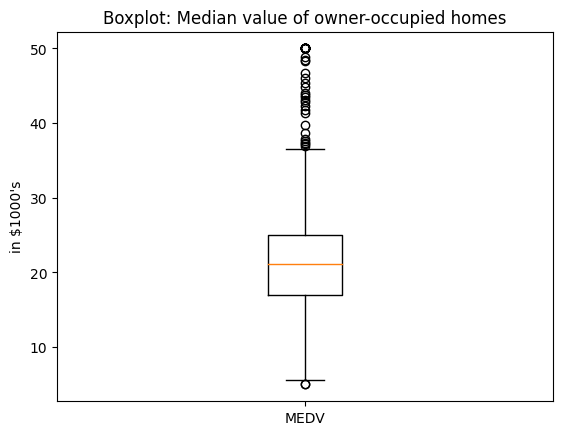

In [49]:
#For the "Median value of owner-occupied homes" (MEDV) provide a boxplot
pyplot.boxplot(boston_df['MEDV'], labels=["MEDV"])
pyplot.title("Boxplot: Median value of owner-occupied homes")
pyplot.ylabel("in $1000's")
pyplot.show()


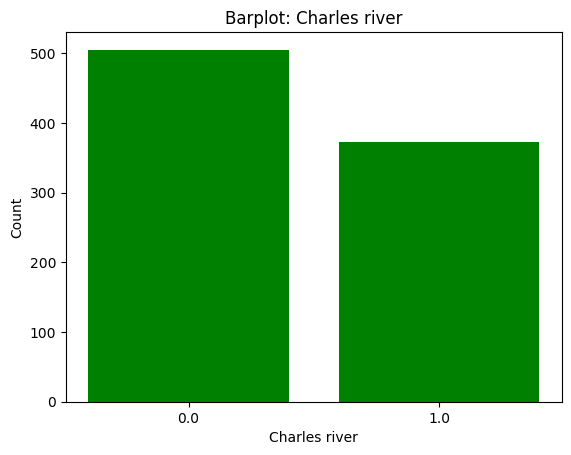

In [50]:
#Provide a  bar plot for the Charles river variable
#using astype(str) to show value with no decimal
pyplot.bar(boston_df['CHAS'].astype(str), boston_df['Unnamed: 0'], color ='green')
pyplot.xlabel("Charles river")
pyplot.ylabel("Count")
pyplot.title("Barplot: Charles river")
pyplot.show()


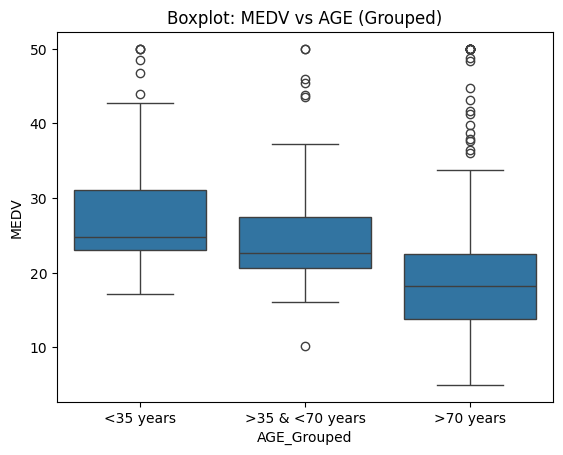

In [87]:
#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'
#Grouping Age
boston_df['AGE_Grouped'] = ">35 & <70 years"
boston_df['AGE_Grouped'][boston_df['AGE']<=35] = "<35 years"
boston_df['AGE_Grouped'][boston_df['AGE']>=70] = ">70 years"

#Create plot
sns.boxplot(x=boston_df['AGE_Grouped'], y=boston_df['MEDV'], order=["<35 years", ">35 & <70 years", ">70 years"])
pyplot.title('Boxplot: MEDV vs AGE (Grouped)')
pyplot.xlabel('AGE_Grouped')
pyplot.ylabel('MEDV')
pyplot.show()


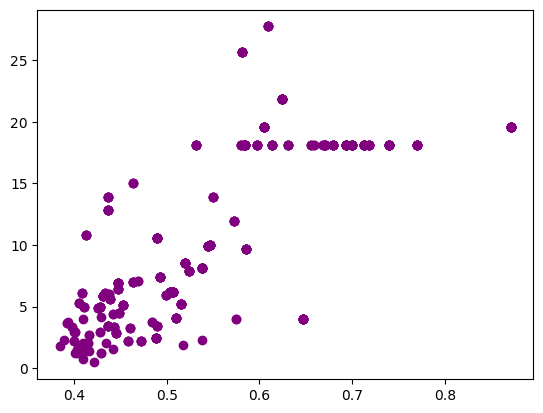

In [64]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
#NOX and INDUS
pyplot.scatter(boston_df['NOX'], boston_df['INDUS'], c ="purple")
pyplot.show()

#weak positive relationship

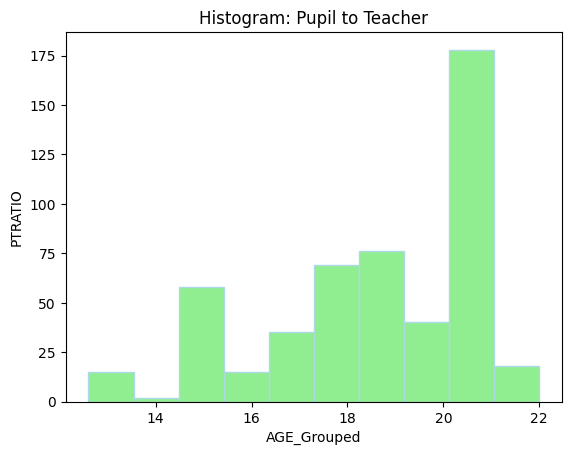

In [89]:
#Create a histogram for the pupil to teacher ratio
pyplot.hist(boston_df['PTRATIO'], color='lightgreen', edgecolor='lightblue')
pyplot.title('Histogram: Pupil to Teacher')
pyplot.xlabel('AGE_Grouped')
pyplot.ylabel('PTRATIO')
pyplot.show()


#### Task 3: Use the appropriate tests to answer the questions provided.
- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [97]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

river_houses = boston_df[boston_df['CHAS'] == 1]['MEDV']
non_river_houses = boston_df[boston_df['CHAS'] == 0]['MEDV']

# t-Test
t_stat, p_value = ttest_ind(river_houses, non_river_houses)
print("T-Stat:", t_stat)
print("P-Value:", p_value)
if p_value < 0.05:
    print("There is a Significant difference")
else:
    print("There is no Significant difference")

T-Stat: 3.996437466090509
P-Value: 7.390623170519905e-05
There is a Significant difference


In [100]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
anova_model = ols('MEDV ~ C(AGE_Grouped)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print(anova_table)

p_value = anova_table["PR(>F)"][0]
if p_value < 0.05:
    print("There is a Significant difference")
else:
    print("There is no Significant difference")

                      sum_sq     df         F        PR(>F)
C(AGE_Grouped)   5401.731883    2.0  36.40765  1.710501e-15
Residual        37314.563532  503.0       NaN           NaN
There is a Significant difference


In [107]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
corr, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(corr)
if corr < 0.3:
    print("no relationship")
if corr < 0.75:
    print("little relatioship")
else:
    print("strong relatioship")

0.7636514469209192
strong relatioship


In [110]:
#What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
model = sm.OLS(boston_df['MEDV'], boston_df['DIS']).fit()

print(model.summary())

print("\nInterpretation:")
print(f"R-squared: {model.rsquared}")
print(f"Coefficients: {model.params}")

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.732
Model:                            OLS   Adj. R-squared (uncentered):              0.732
Method:                 Least Squares   F-statistic:                              1380.
Date:                Tue, 30 Jul 2024   Prob (F-statistic):                   1.52e-146
Time:                        21:43:00   Log-Likelihood:                         -1999.8
No. Observations:                 506   AIC:                                      4002.
Df Residuals:                     505   BIC:                                      4006.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------